# Postprocess PINN calculations

This notebook postprocesses the calculations of the Physics-Informed Neural Network (PINN) for both empirical and simulated dust flux depositions during the Holocene and the Last Glacial Maximum. The results are visualized on a global map and several statistics are compared with kriging interpolation.

## Preliminaries

Import the necessary libraries and specify the data folders.

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
FIGURE_PATH = "../Figures/"
DATA_PATH = "../Data/"
DATASETS_PATH = DATA_PATH + "processed_data/"
MODEL_RESULTS_PATH = DATA_PATH + "model_results/manuscript/"

In [4]:
with open("functions_plot_calculations.py", 'r') as file:
    content = file.read()

# Execute the content of the .py file
exec(content)

In [5]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

## Load the datasets

Load the empirical and simulated datasets and the kriging interpolation.

In [6]:
df_empirical_Holocene = pd.read_csv(DATASETS_PATH + "df_empirical_Holocene.csv")
df_empirical_LGM = pd.read_csv(DATASETS_PATH + "df_empirical_LGM.csv")
df_simulated_Holocene = pd.read_csv(DATASETS_PATH + "df_simulation_Holocene.csv")
df_simulated_LGM = pd.read_csv(DATASETS_PATH + "df_simulation_LGM.csv")

In [7]:
df_kriging_Holocene = pd.read_csv(DATASETS_PATH + "df_kriging_Holocene.csv")
df_kriging_LGM = pd.read_csv(DATASETS_PATH + "df_kriging_LGM.csv")

df_kriging_Holocene.sort_values(['lat', 'lon'], ascending=True, inplace=True)
df_kriging_LGM.sort_values(['lat', 'lon'], ascending=True, inplace=True)

## Visualization of model results

Plot the global map of reconstructed dust flux deposition rates, fit a log-normal distribution to the data, and compare the different techniques in a scatter plot.

### Visualize PINN calculation from empirical dataset for the Holocene period

In [8]:
name_period = "Holocene"
name_dataset = "empirical"

In [9]:
df_pinn_results_training = pd.read_csv(MODEL_RESULTS_PATH + "df_pinn_"+name_dataset+"_"+name_period+"_training_points.csv")
df_pinn_results_global_grid = pd.read_csv(MODEL_RESULTS_PATH + "df_pinn_"+name_dataset+"_"+name_period+"_global_grid.csv")

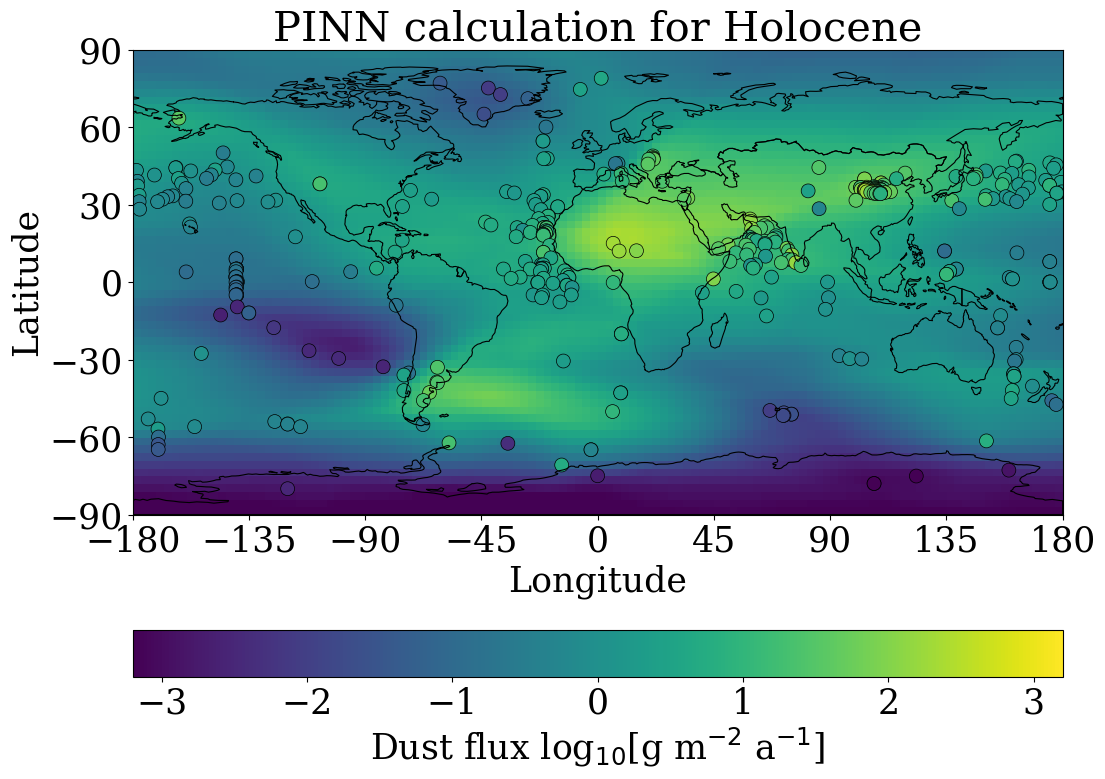

In [10]:
plot_dust_deposition_map(
    df_pinn_results_global_grid,
    df_pinn_results_training,
    title='PINN calculation for Holocene',
    name_to_save='PINN_MAP_EMPIRICAL_HOLOCENE',
    figure_save_path=FIGURE_PATH,
    label_str='log_dep',
)

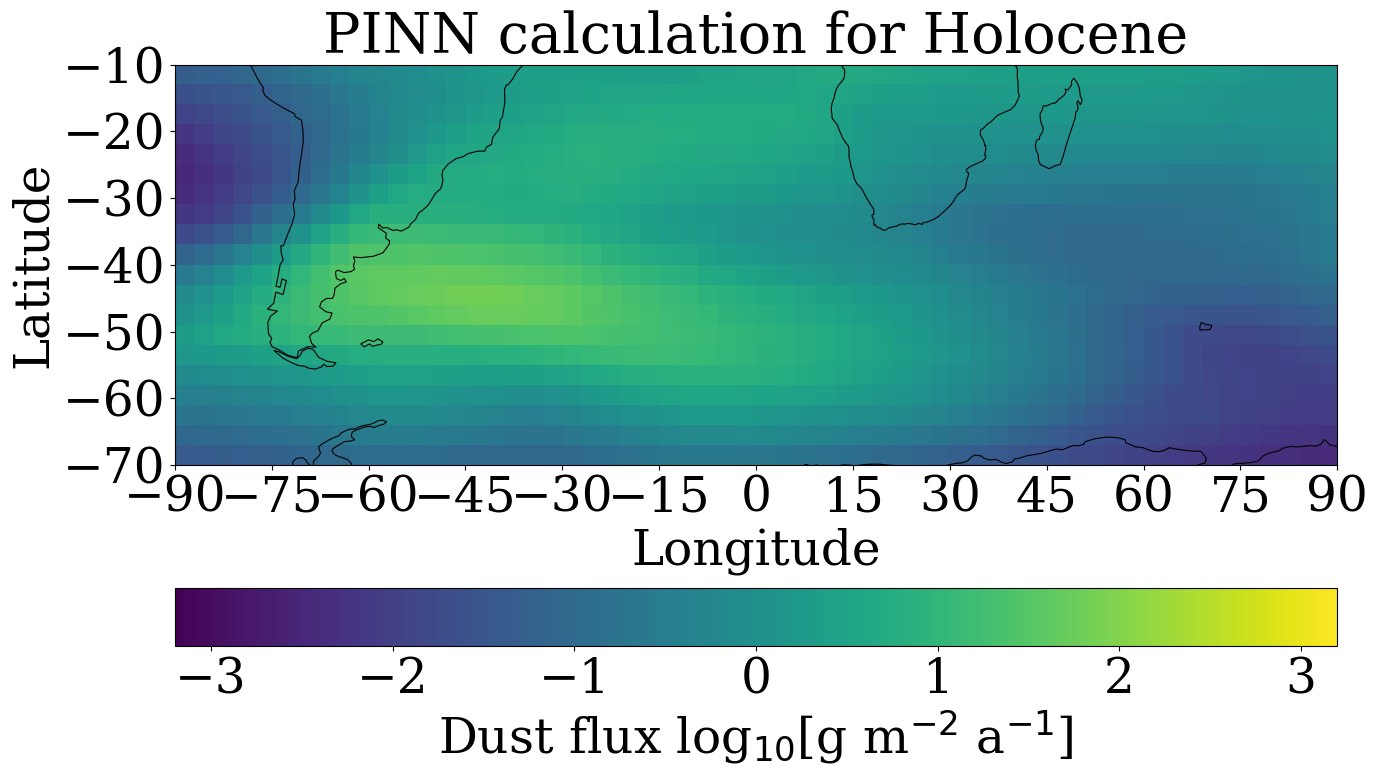

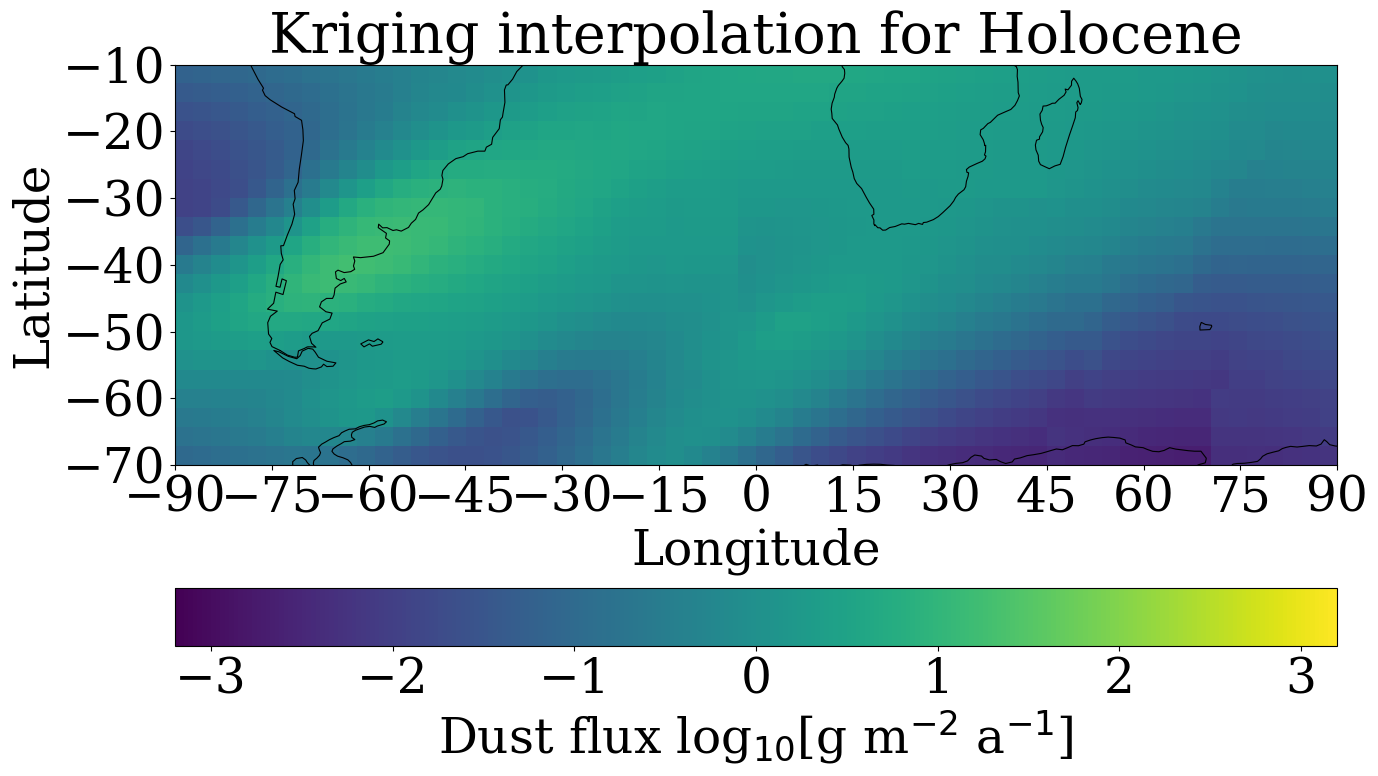

In [11]:
plot_dust_deposition_map_zoom(
    df=df_pinn_results_global_grid,
    title='PINN calculation for Holocene',
    name_to_save='PINN_ZOOM_EMPIRICAL_HOLOCENE',
    figure_save_path=FIGURE_PATH,
    label_str='PINN_log_dep',
)

plot_dust_deposition_map_zoom(
    df=df_kriging_Holocene,
    title='Kriging interpolation for Holocene',
    name_to_save='KRIGING_ZOOM_EMPIRICAL_HOLOCENE',
    figure_save_path=FIGURE_PATH,
    label_str='log_dep',
)

In [12]:
# Interpolate the results of the kriging in the measurement sites available in the empirical dataset,
# so that scatter plots can be visualized.

x = df_kriging_Holocene[['lon', 'lat']].values
y = df_kriging_Holocene['log_dep'].values
x_interpolate = df_pinn_results_training[['lon', 'lat']].values
y_interpolate = griddata(x, y, x_interpolate, method='nearest')

df_pinn_results_training['kriging_log_dep'] = y_interpolate

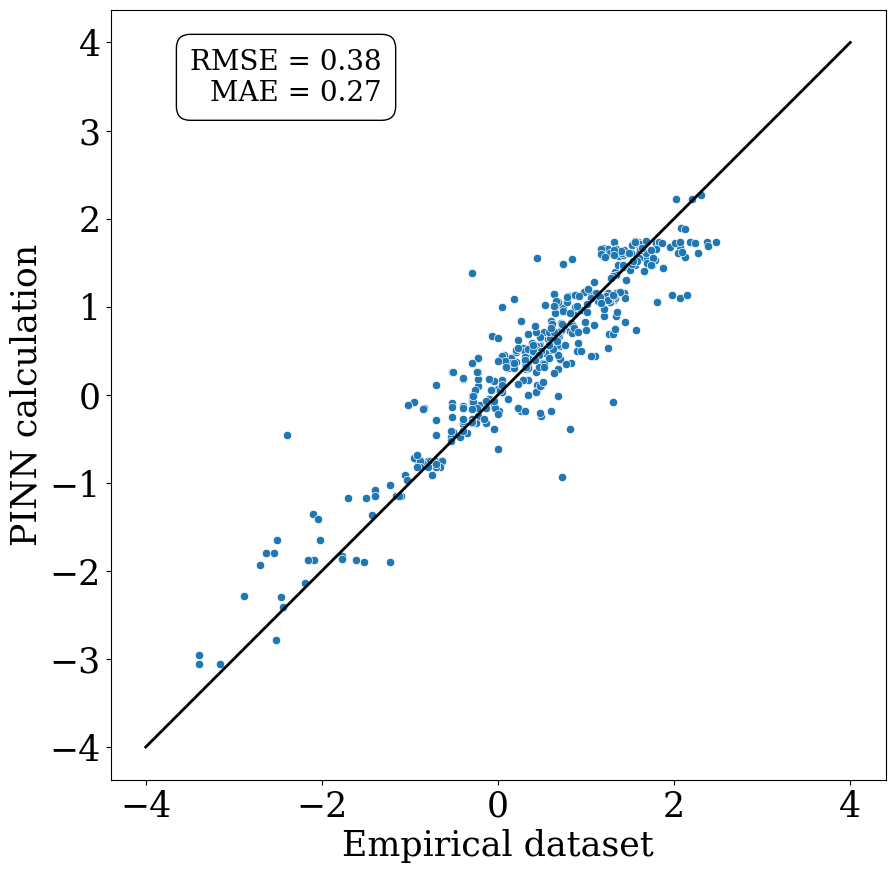

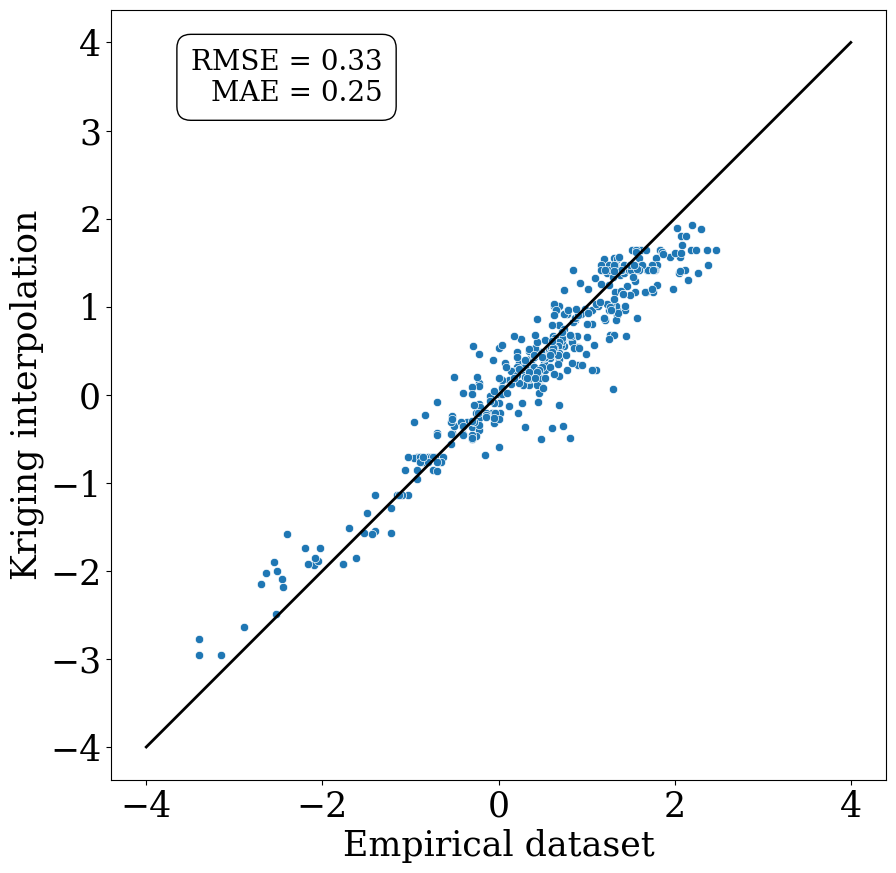

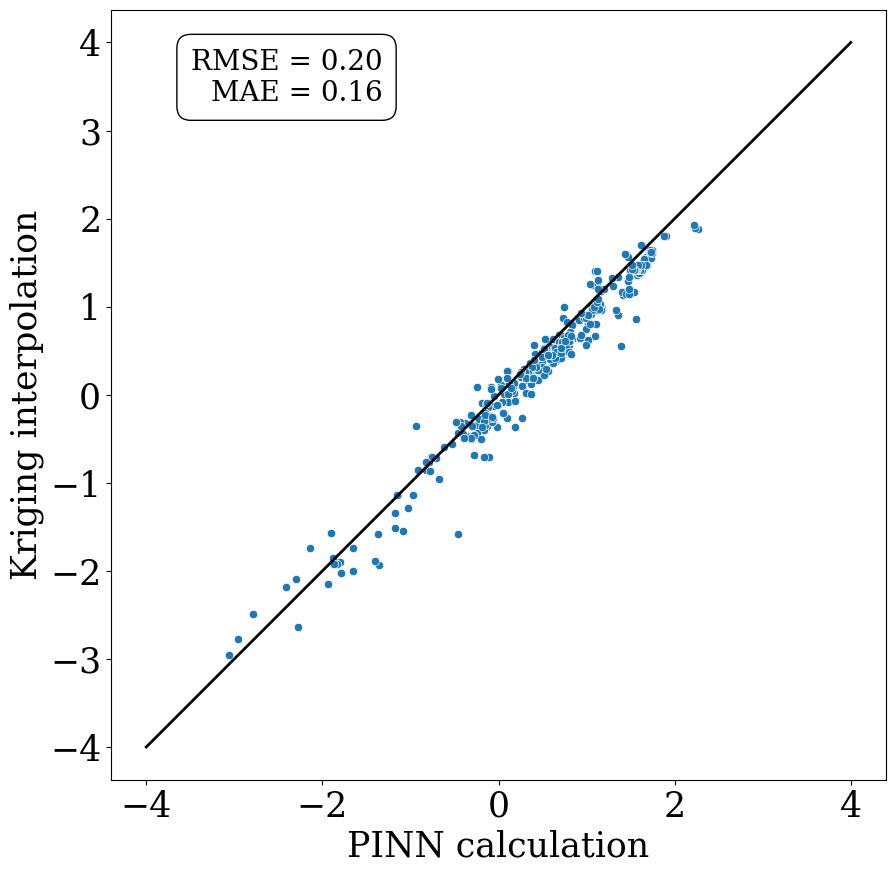

In [13]:
plot_scatterplot_empirical(
    df=df_pinn_results_training,
    x_variable="log_dep",
    y_variable="PINN_log_dep",
    x_label="Empirical dataset",
    y_label="PINN calculation",
    name_to_save="SCATTER_PINN_EMPIRICAL_HOLOCENE",
    figure_save_path=FIGURE_PATH,
)

plot_scatterplot_empirical(
    df=df_pinn_results_training,
    x_variable="log_dep",
    y_variable="kriging_log_dep",
    x_label="Empirical dataset",
    y_label="Kriging interpolation",
    name_to_save="SCATTER_KRIGING_EMPIRICAL_HOLOCENE",
    figure_save_path=FIGURE_PATH,
)

plot_scatterplot_empirical(
    df=df_pinn_results_training,
    x_variable="PINN_log_dep",
    y_variable="kriging_log_dep",
    x_label="PINN calculation",
    y_label="Kriging interpolation",
    name_to_save="SCATTER_PINN_KRIGING_HOLOCENE",
    figure_save_path=FIGURE_PATH,
)

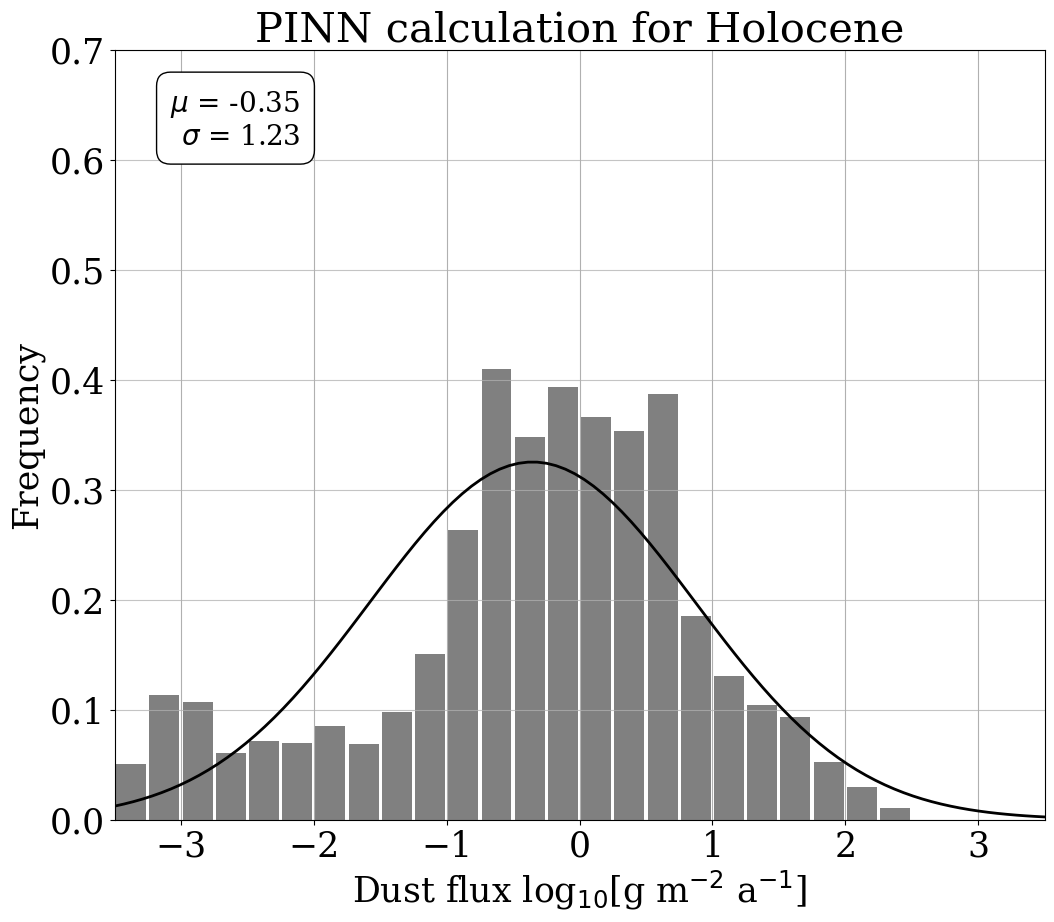

In [14]:
plot_hist(
    df=df_pinn_results_global_grid,
    title='PINN calculation for Holocene',
    name_to_save='PINN_HIST_EMPIRICAL_HOLOCENE',
    figure_save_path=FIGURE_PATH,
)

### Visualize PINN calculation from empirical dataset for the LGM period

In [15]:
name_period = "LGM"
name_dataset = "empirical"

In [16]:
df_pinn_results_training = pd.read_csv(MODEL_RESULTS_PATH + "df_pinn_"+name_dataset+"_"+name_period+"_training_points.csv")
df_pinn_results_global_grid = pd.read_csv(MODEL_RESULTS_PATH + "df_pinn_"+name_dataset+"_"+name_period+"_global_grid.csv")

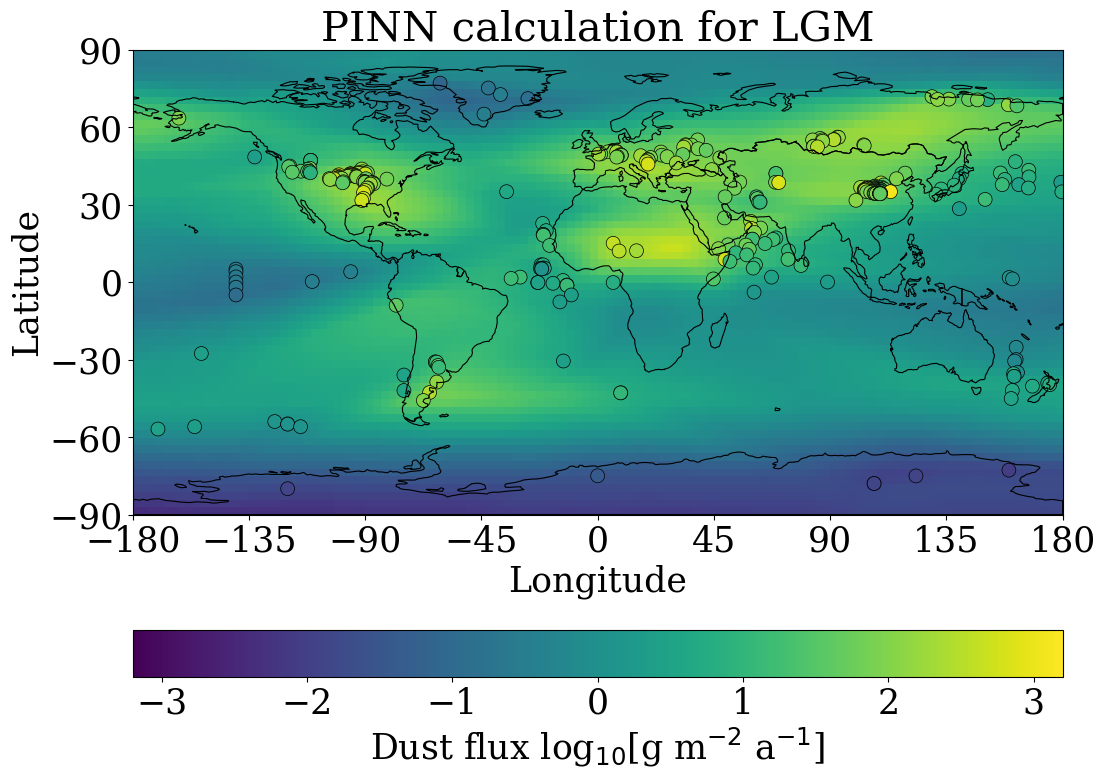

In [17]:
plot_dust_deposition_map(
    df_pinn_results_global_grid,
    df_pinn_results_training,
    title='PINN calculation for LGM',
    name_to_save='PINN_MAP_EMPIRICAL_LGM',
    figure_save_path=FIGURE_PATH,
    label_str='log_dep',
)

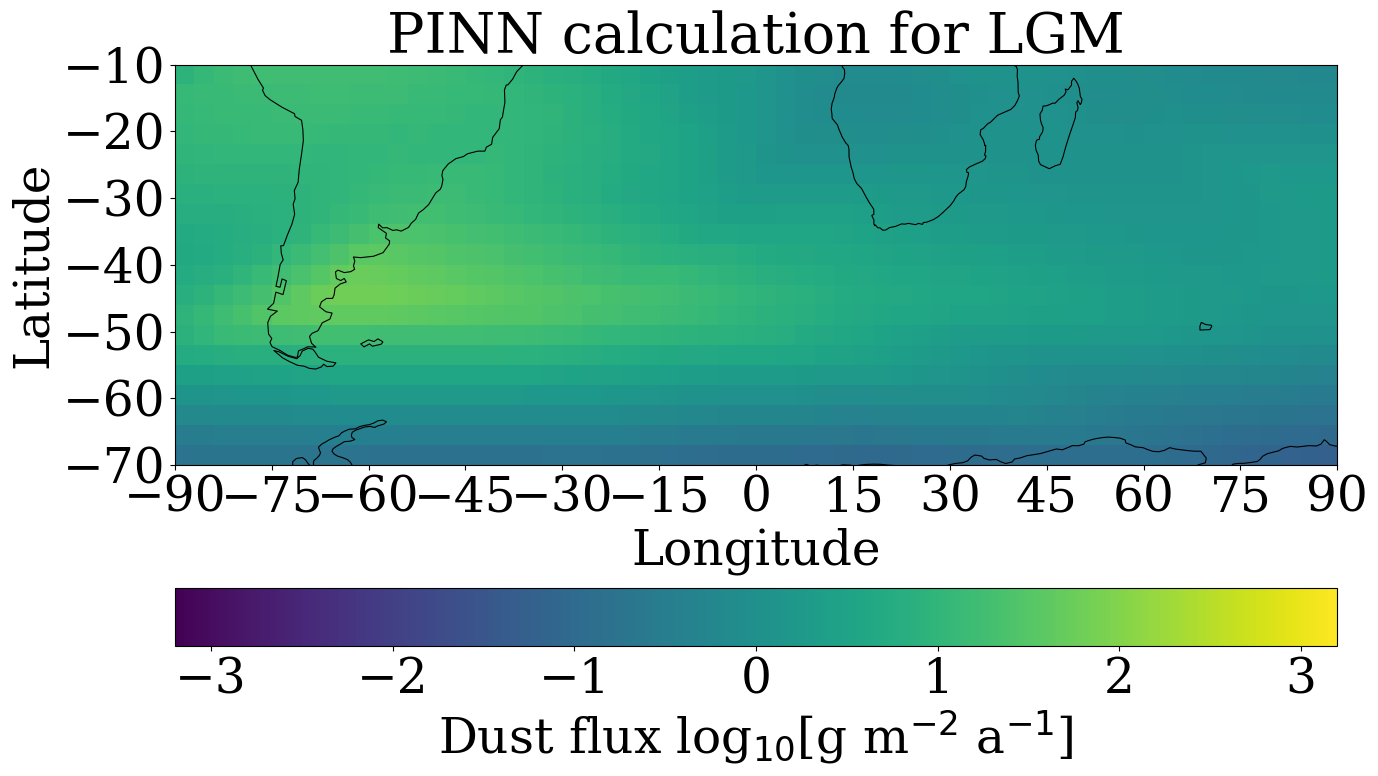

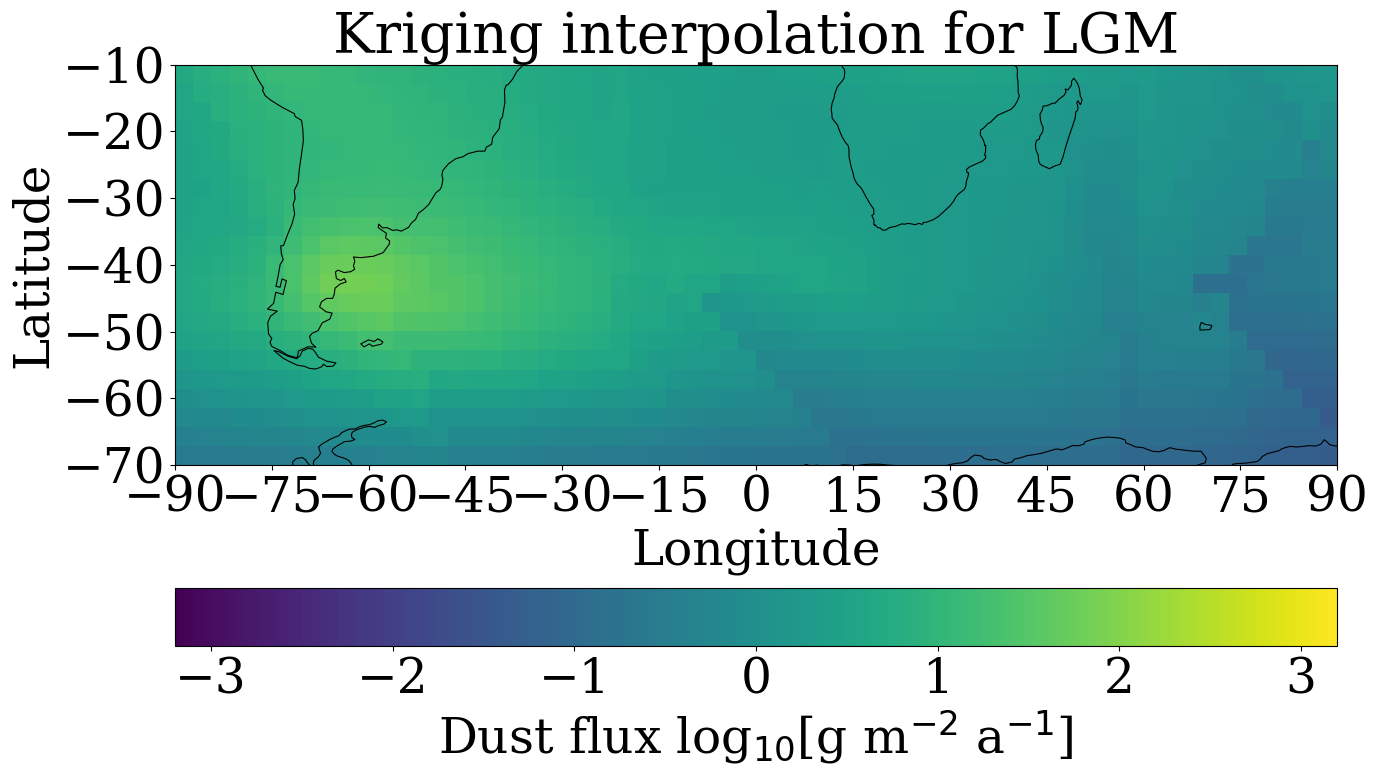

In [18]:
plot_dust_deposition_map_zoom(
    df=df_pinn_results_global_grid,
    title='PINN calculation for LGM',
    name_to_save='PINN_ZOOM_EMPIRICAL_LGM',
    figure_save_path=FIGURE_PATH,
    label_str='PINN_log_dep',
)

plot_dust_deposition_map_zoom(
    df=df_kriging_LGM,
    title='Kriging interpolation for LGM',
    name_to_save='KRIGING_ZOOM_EMPIRICAL_LGM',
    figure_save_path=FIGURE_PATH,
    label_str='log_dep',
)

In [19]:
# Interpolate the results of the kriging in the measurement sites available in the empirical dataset,
# so that scatter plots can be visualized.

x = df_kriging_LGM[['lon', 'lat']].values
y = df_kriging_LGM['log_dep'].values
x_interpolate = df_pinn_results_training[['lon', 'lat']].values
y_interpolate = griddata(x, y, x_interpolate, method='nearest')

df_pinn_results_training['kriging_log_dep'] = y_interpolate

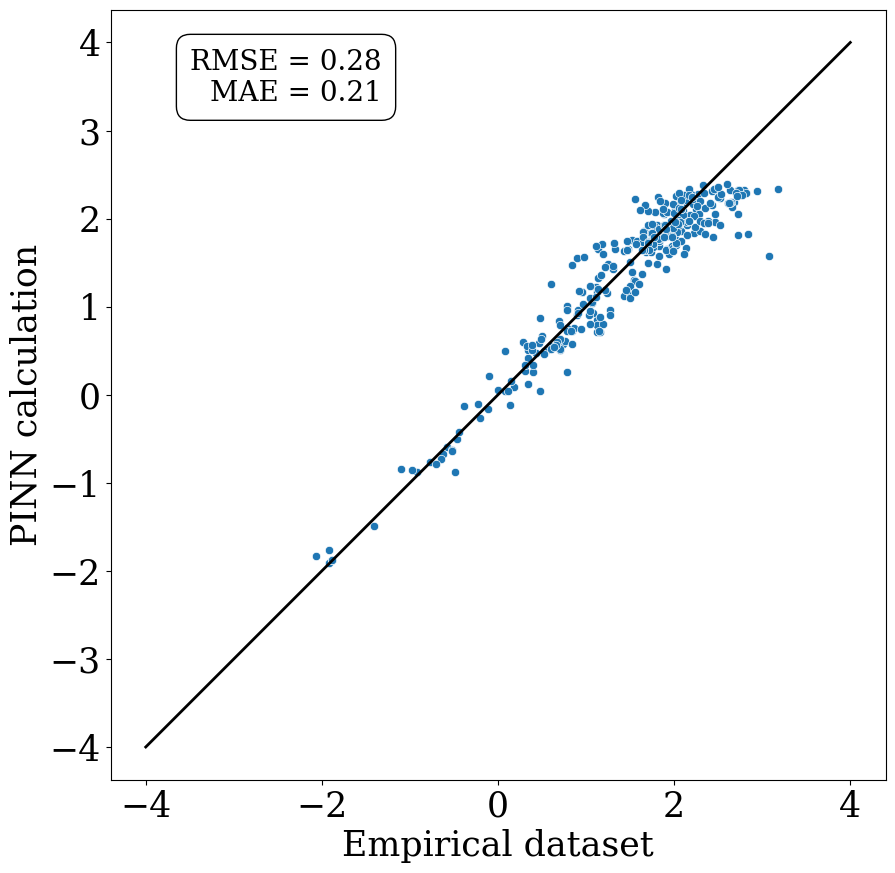

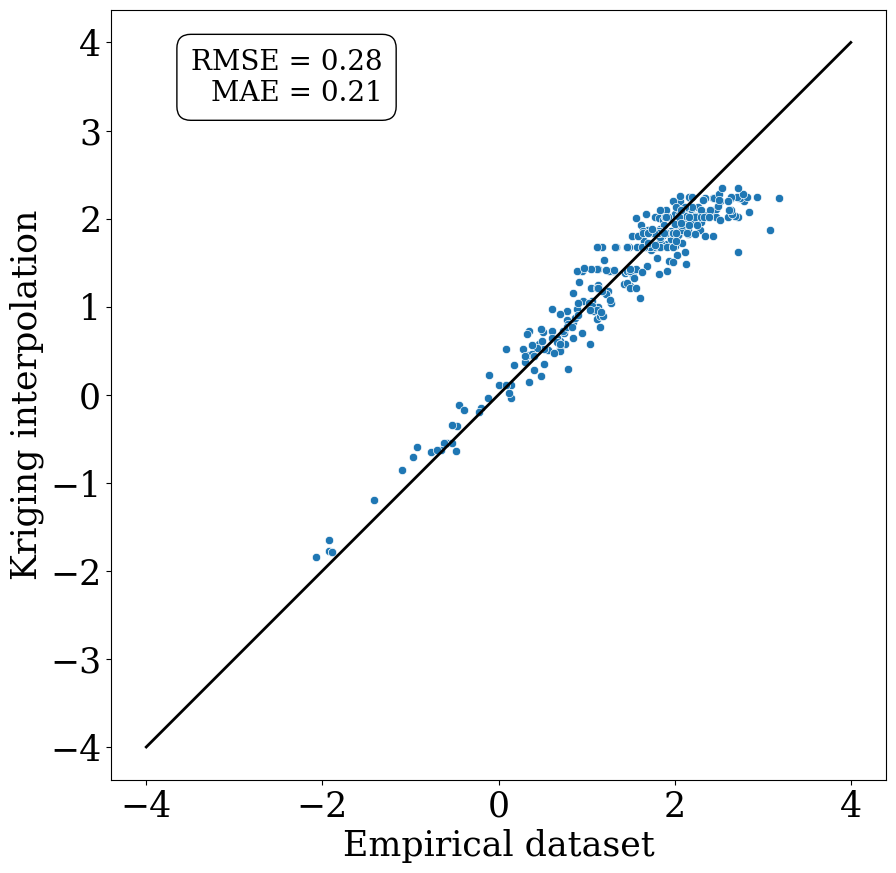

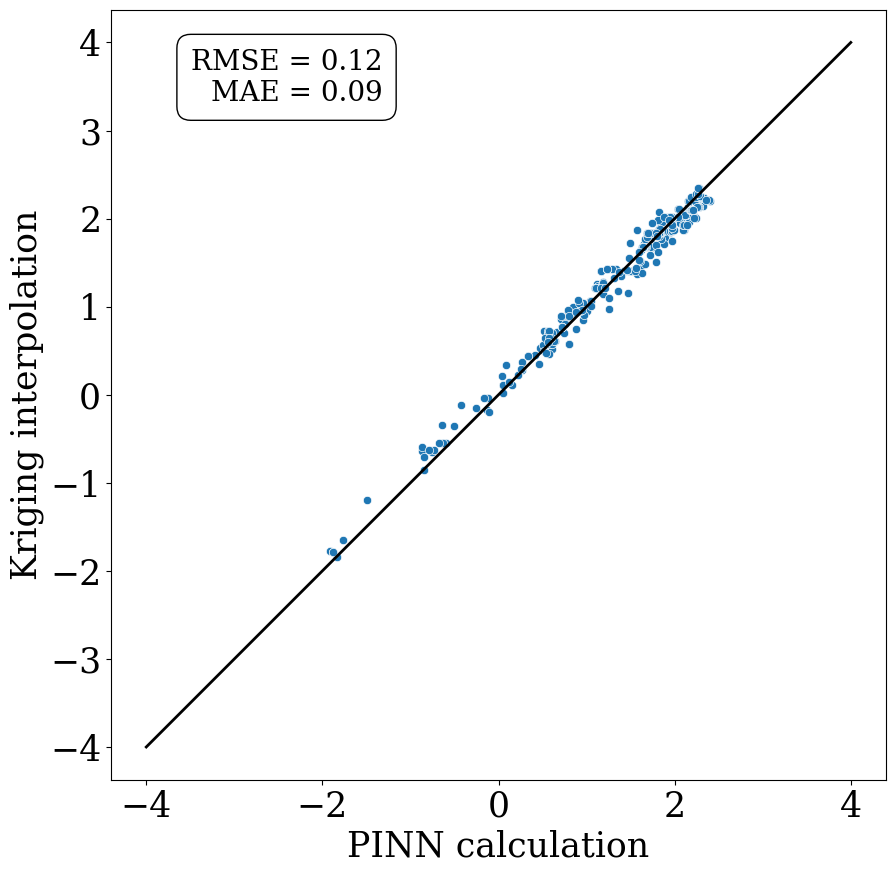

In [20]:
plot_scatterplot_empirical(
    df=df_pinn_results_training,
    x_variable="log_dep",
    y_variable="PINN_log_dep",
    x_label="Empirical dataset",
    y_label="PINN calculation",
    name_to_save="SCATTER_PINN_EMPIRICAL_LGM",
    figure_save_path=FIGURE_PATH,
)

plot_scatterplot_empirical(
    df=df_pinn_results_training,
    x_variable="log_dep",
    y_variable="kriging_log_dep",
    x_label="Empirical dataset",
    y_label="Kriging interpolation",
    name_to_save="SCATTER_KRIGING_EMPIRICAL_LGM",
    figure_save_path=FIGURE_PATH,
)

plot_scatterplot_empirical(
    df=df_pinn_results_training,
    x_variable="PINN_log_dep",
    y_variable="kriging_log_dep",
    x_label="PINN calculation",
    y_label="Kriging interpolation",
    name_to_save="SCATTER_PINN_KRIGING_LGM",
    figure_save_path=FIGURE_PATH,
)

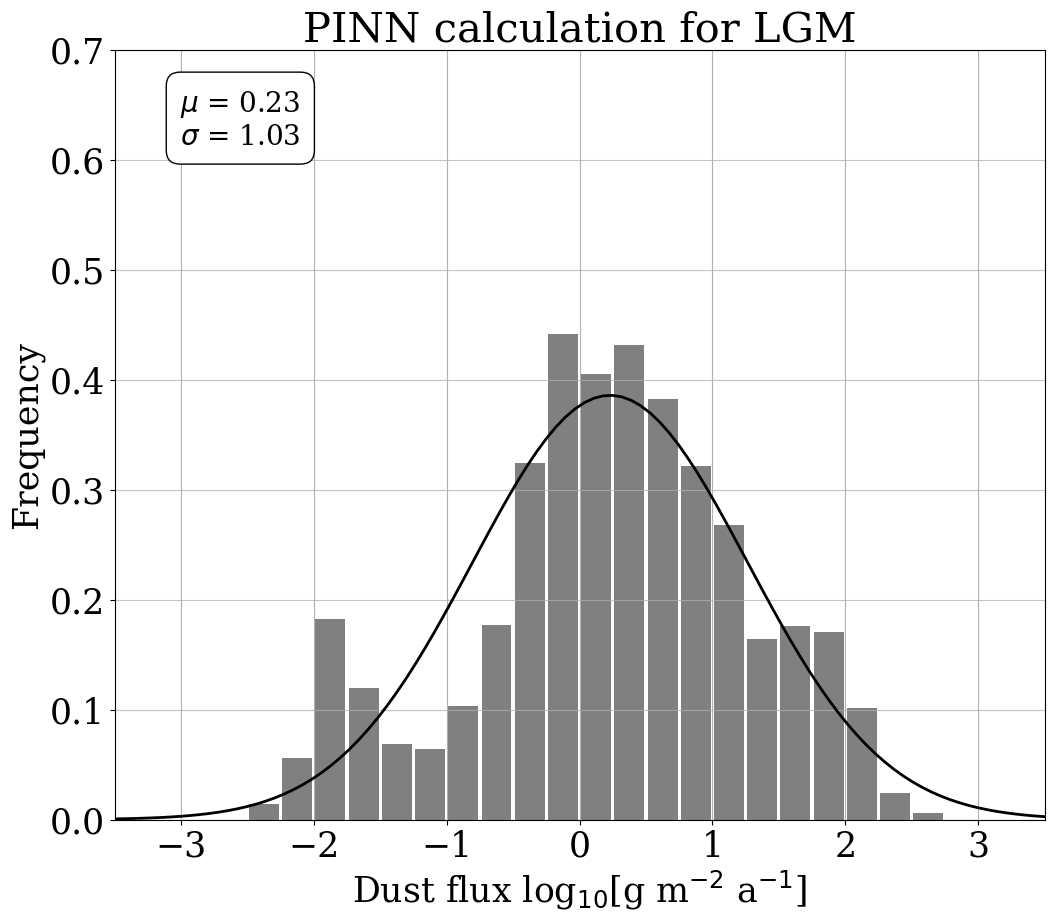

In [21]:
plot_hist(
    df=df_pinn_results_global_grid,
    title='PINN calculation for LGM',
    name_to_save='PINN_HIST_EMPIRICAL_LGM',
    figure_save_path=FIGURE_PATH,
)

### Visualize PINN calculation from simulated dataset for the Holocene period

In [22]:
name_period = "Holocene"
name_dataset = "simulated"

In [23]:
df_pinn_results = pd.read_csv(MODEL_RESULTS_PATH + "df_pinn_"+name_dataset+"_"+name_period+".csv")

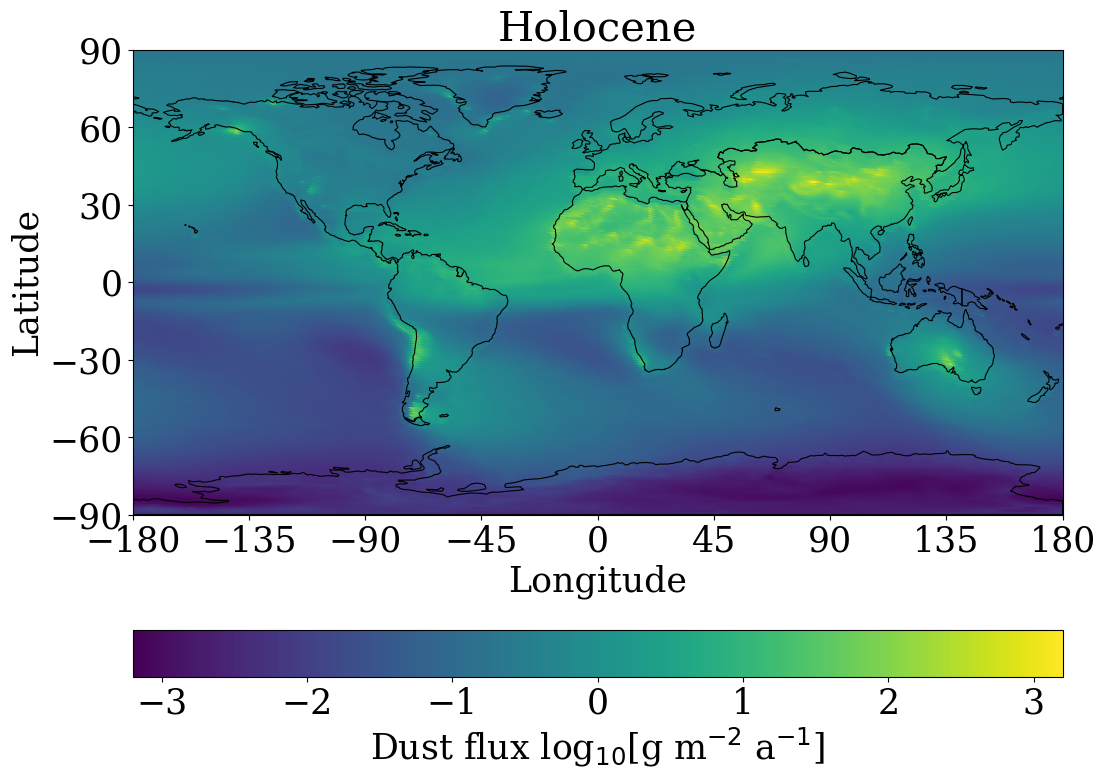

In [24]:
plot_dust_deposition_simulated(
    df=df_pinn_results,
    title='Holocene',
    name_to_save='PINN_MAP_SIMULATED_HOLOCENE',
    figure_save_path=FIGURE_PATH,
)

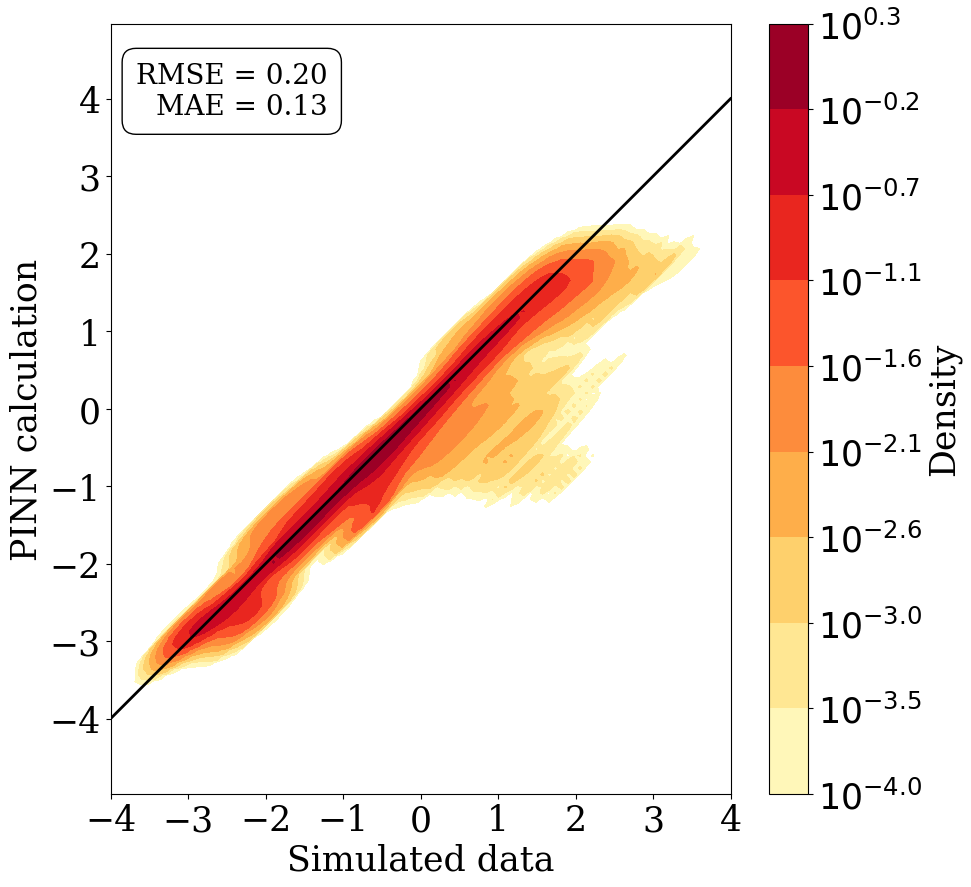

In [25]:
plot_scatterplot_simulated(
    df=df_pinn_results,
    name_to_save="SCATTER_SIMULATED_HOLOCENE",
    x_label="Simulated data",
    y_label="PINN calculation",
    figure_save_path=FIGURE_PATH,
)

### Visualize PINN calculation from simulated dataset for the LGM period

In [26]:
name_period = "LGM"
name_dataset = "simulated"

In [27]:
df_pinn_results = pd.read_csv(MODEL_RESULTS_PATH + "df_pinn_"+name_dataset+"_"+name_period+".csv")

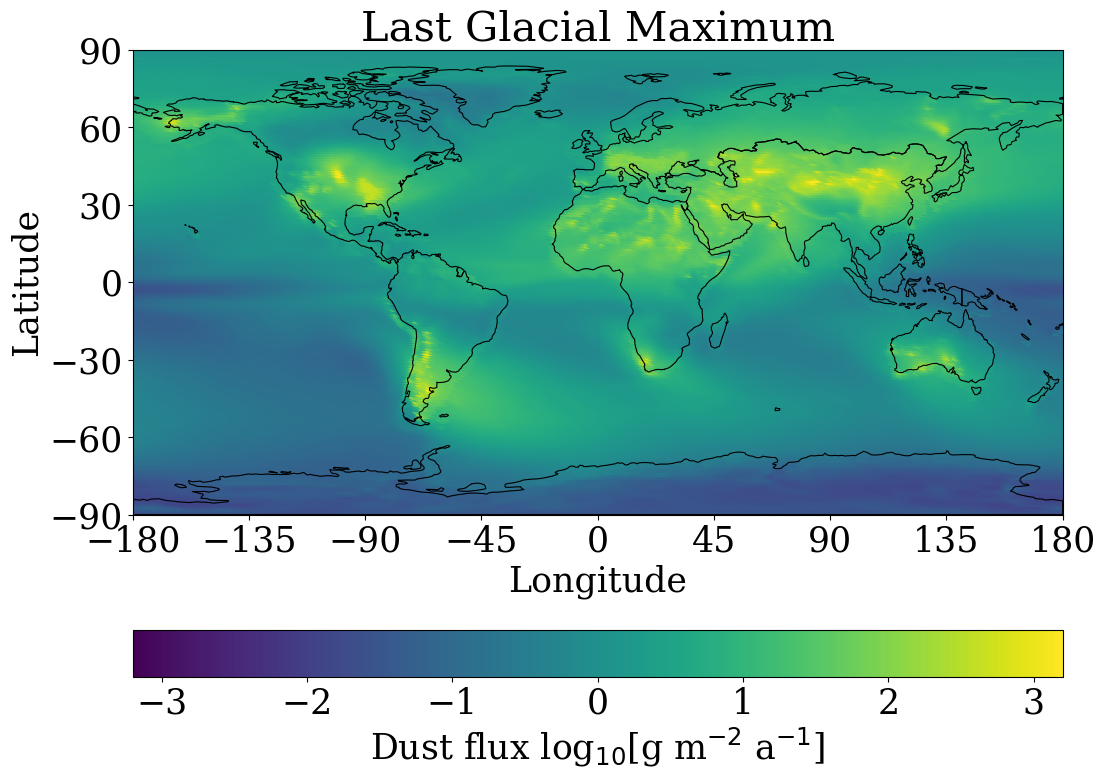

In [28]:
plot_dust_deposition_simulated(
    df=df_pinn_results,
    title='Last Glacial Maximum',
    name_to_save='PINN_MAP_SIMULATED_LGM',
    figure_save_path=FIGURE_PATH,
)

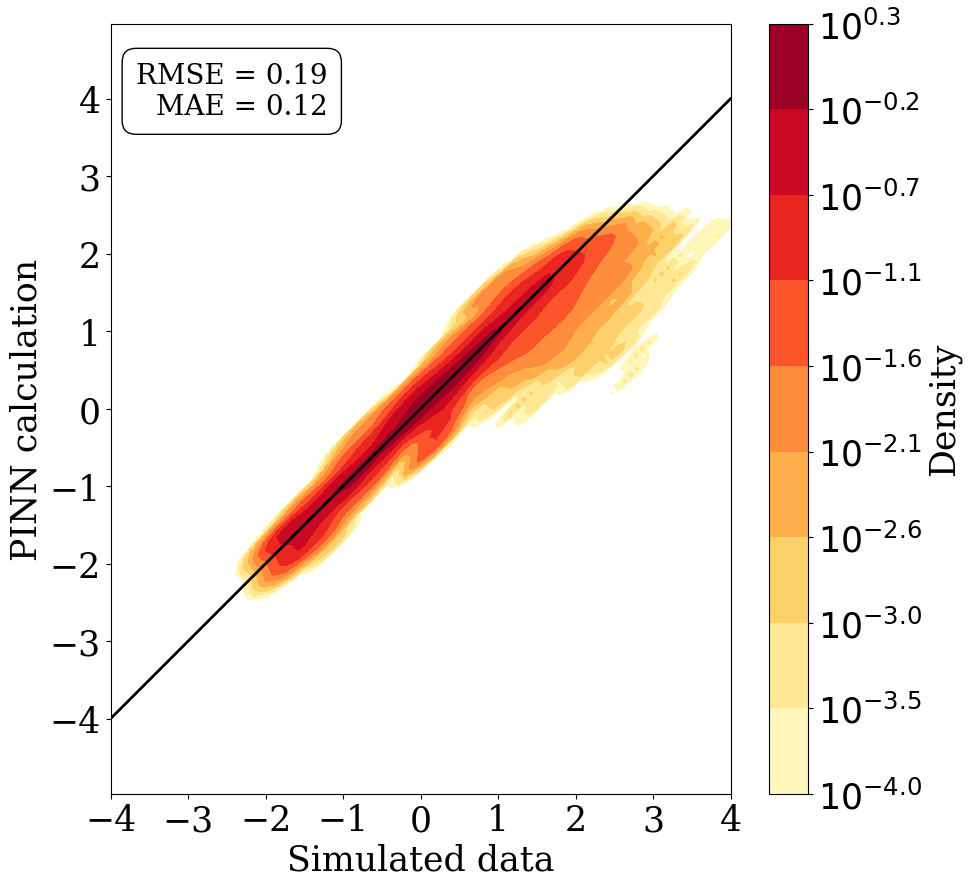

In [29]:
plot_scatterplot_simulated(
    df=df_pinn_results,
    name_to_save="SCATTER_SIMULATED_LGM",
    x_label="Simulated data",
    y_label="PINN calculation",
    figure_save_path=FIGURE_PATH,
)